In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sc
import seaborn as sns

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/MOT/PNQ_AQI.csv")
df

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2009-01-01 00:00:00,15,53,179.0,NaN,NaN,153.0,MPCB-KR
1,2009-02-01 00:00:00,15,48,156.0,NaN,NaN,137.0,MPCB-KR
2,2009-03-01 00:00:00,13,51,164.0,NaN,NaN,143.0,MPCB-KR
3,2009-04-01 00:00:00,8,37,135.0,NaN,NaN,123.0,MPCB-KR
4,2009-07-01 00:00:00,13,36,140.0,NaN,NaN,127.0,MPCB-KR
...,...,...,...,...,...,...,...,...
7839,18-01-2019,41,100,134.0,300.0,NaN,123.0,MPCB-SWGT
7840,19-01-2019,50,132,172.0,446.0,NaN,152.0,MPCB-SWGT
7841,23-01-2019,47,138,210.0,558.0,NaN,173.0,MPCB-SWGT
7842,2019-02-02 00:00:00,29,88,82.0,259.0,NaN,108.0,MPCB-SWGT


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        7844 non-null   object 
 1   SO2 µg/m3   7844 non-null   object 
 2   Nox µg/m3   7844 non-null   object 
 3   RSPM µg/m3  7843 non-null   float64
 4   SPM         2970 non-null   float64
 5   CO2 µg/m3   0 non-null      float64
 6   AQI         7787 non-null   float64
 7   Location    7844 non-null   object 
dtypes: float64(4), object(4)
memory usage: 490.4+ KB


In [6]:
df.isnull().sum()

Date             0
SO2 µg/m3        0
Nox µg/m3        0
RSPM µg/m3       1
SPM           4874
CO2 µg/m3     7844
AQI             57
Location         0
dtype: int64

In [7]:
df.drop(columns='CO2 µg/m3',axis=1,inplace=True)

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
rep={'MPCB-KR':'Karve Road','MPCB-SWGT':'Swargate','MPCB-BSRI':'Bhosari','MPCB-NS':'Nal Stop','MPCB-PMPR':'Pimpri','Pimpri Chinchwad':'Chinchwad'}

df['Location'].replace(rep,inplace=True)

In [10]:
df
df.isnull().sum()

Date             0
SO2 µg/m3        0
Nox µg/m3        0
RSPM µg/m3       1
SPM           4874
AQI             57
Location         0
dtype: int64

In [11]:
df.sort_values(by='Date',inplace=True)
df=df.ffill().bfill()

In [12]:
df.isnull().sum()

Date          0
SO2 µg/m3     0
Nox µg/m3     0
RSPM µg/m3    0
SPM           0
AQI           0
Location      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7844 entries, 0 to 6947
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7844 non-null   datetime64[ns]
 1   SO2 µg/m3   7844 non-null   object        
 2   Nox µg/m3   7844 non-null   object        
 3   RSPM µg/m3  7844 non-null   float64       
 4   SPM         7844 non-null   float64       
 5   AQI         7844 non-null   float64       
 6   Location    7844 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 490.2+ KB


In [14]:
df['SO2 µg/m3']=pd.to_numeric(df['SO2 µg/m3'],errors='coerce')
df['SO2 µg/m3']=df['SO2 µg/m3'].ffill().bfill()


df['Nox µg/m3']=pd.to_numeric(df['Nox µg/m3'],errors='coerce')
df['Nox µg/m3']=df['Nox µg/m3'].ffill().bfill()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7844 entries, 0 to 6947
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7844 non-null   datetime64[ns]
 1   SO2 µg/m3   7844 non-null   float64       
 2   Nox µg/m3   7844 non-null   float64       
 3   RSPM µg/m3  7844 non-null   float64       
 4   SPM         7844 non-null   float64       
 5   AQI         7844 non-null   float64       
 6   Location    7844 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 490.2+ KB


In [16]:
df['AQI Rating']=pd.cut(df['AQI'],bins=[0,50,100,150,200,300,df['AQI'].max()]
                        ,labels=['good','moderate','moderately unhealth','unhealthy','very unhealthy','Hazardous'])
df.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,AQI,Location,AQI Rating
0,2009-01-01,15.0,53.0,179.0,366.0,153.0,Karve Road,unhealthy
1282,2009-01-01,19.0,60.0,161.0,366.0,141.0,Swargate,moderately unhealth
26,2009-01-02,19.0,16.0,140.0,366.0,127.0,Karve Road,moderately unhealth
1618,2009-01-04,26.0,28.0,102.0,261.0,101.0,Bhosari,moderately unhealth
74,2009-01-04,20.0,20.0,150.0,261.0,133.0,Karve Road,moderately unhealth


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


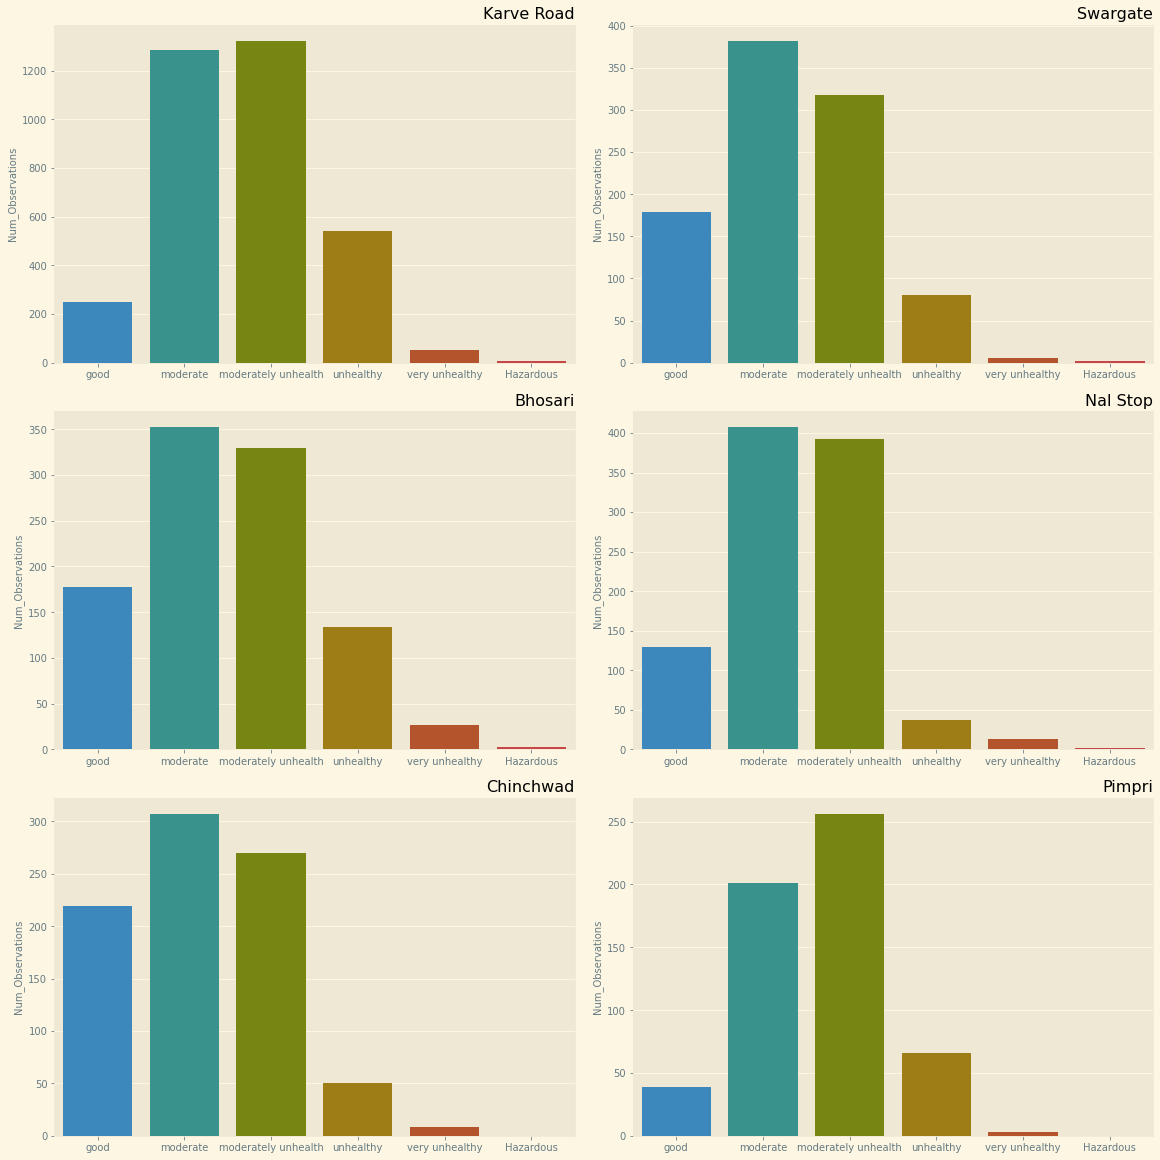

In [17]:
plt.style.use('Solarize_Light2')
plt.rcParams['font.size']=10
locations=[x for x in df['Location'].unique()]
fig,ax=plt.subplots(3,2,figsize=(16,16),constrained_layout=True)
n=0
for i in range(3):
    for j in range(2):
            sns.countplot(df[df['Location']==locations[n]]['AQI Rating'],ax=ax[i,j])
            ax[i,j].set_title(locations[n],y=1,loc='right')
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('Num_Observations',size=10)
            n+=1
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

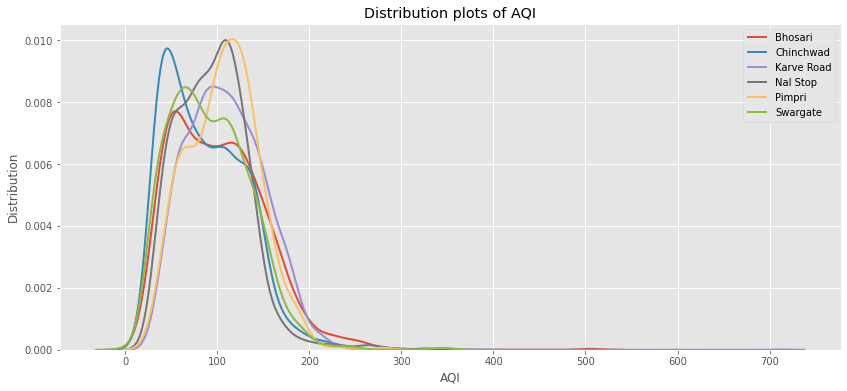

In [18]:
#lets see the distribution of AQI
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(14,6))
for key,grp in df.groupby('Location'):
    sns.distplot(grp['AQI'],label=key,hist=False,ax=ax)
plt.title('Distribution plots of AQI')
plt.xlabel('AQI')
plt.ylabel('Distribution')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

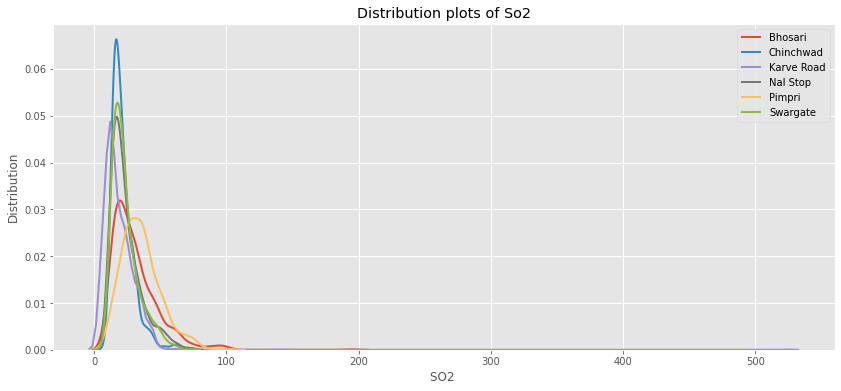

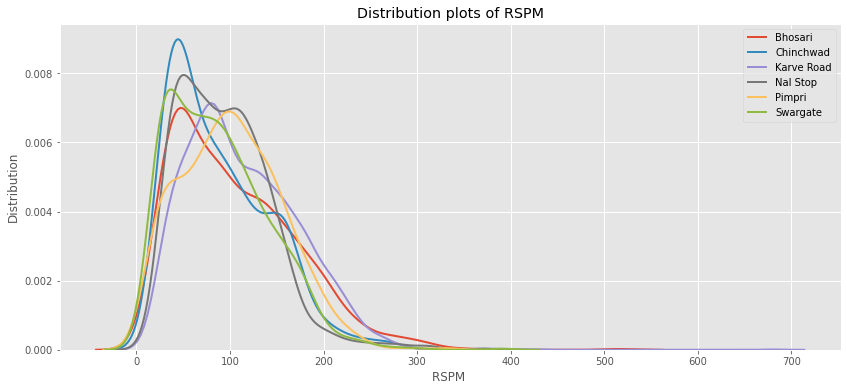

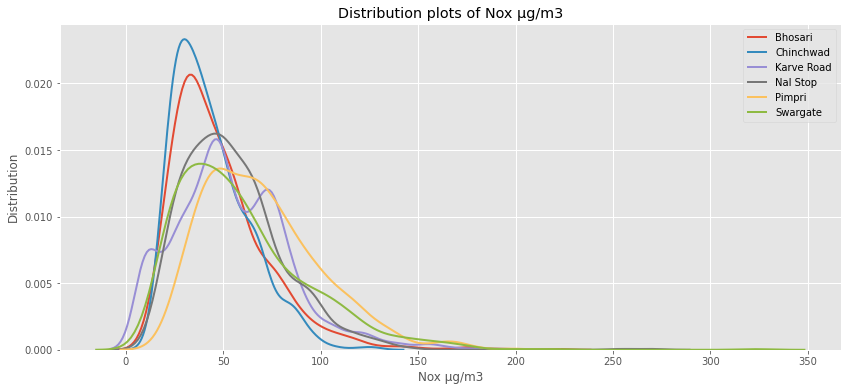

In [19]:
fig,ax=plt.subplots(figsize=(14,6))
for key,grp in df.groupby('Location'):
    sns.distplot(grp['SO2 µg/m3'],label=key,hist=False,ax=ax)
plt.title('Distribution plots of So2')
plt.xlabel('SO2 ')
plt.ylabel('Distribution')
plt.legend()


fig,ax=plt.subplots(figsize=(14,6))
for key,grp in df.groupby('Location'):
    sns.distplot(grp['RSPM µg/m3'],label=key,hist=False,ax=ax)
plt.title('Distribution plots of RSPM')
plt.xlabel('RSPM ')
plt.ylabel('Distribution')
plt.legend()

fig,ax=plt.subplots(figsize=(14,6))
for key,grp in df.groupby('Location'):
    sns.distplot(grp['Nox µg/m3'],label=key,hist=False,ax=ax)
plt.title('Distribution plots of Nox µg/m3')
plt.xlabel('Nox µg/m3')
plt.ylabel('Distribution')
plt.legend()

#**Mean AQI for each month over the data**

In [20]:

d={}
for key,grp in df.groupby('Location'):
    a=grp.groupby(grp['Date'].dt.month)['AQI'].mean()
    d[key]=a
monthly_avg=pd.DataFrame(d)
monthly_avg.index.name='Months'
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
monthly_avg.reset_index(inplace=True)
monthly_avg['Months'].replace(months,inplace=True)
monthly_avg.set_index('Months',inplace=True)
monthly_avg

,Bhosari,Chinchwad,Karve Road,Nal Stop,Pimpri,Swargate
Months,,,,,,
Jan,139.031915,121.708333,128.340764,114.943182,130.363636,116.200000
Feb,121.988889,108.600000,120.156794,106.932432,122.850746,107.592105
Mar,107.547619,106.794118,121.958621,102.878049,115.888889,99.963855
Apr,95.246914,86.661538,115.876325,92.738636,96.933333,82.214286
May,83.604938,66.012821,105.878049,82.644737,85.100000,76.423077
June,79.285714,63.478873,91.111498,81.679487,90.218750,73.418919
July,73.823529,63.134328,84.873754,77.179775,86.083333,73.076923
Aug,71.476190,59.197183,81.918919,76.565789,80.456522,64.135135
Sep,83.588235,68.260274,97.073684,73.300000,88.025641,72.534247


Text(0.5, 0, 'Month')

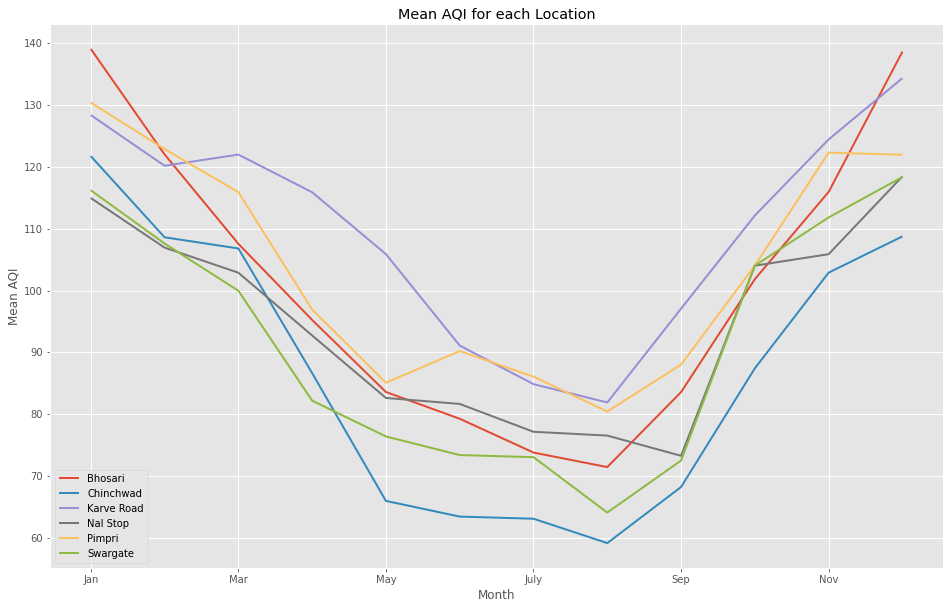

In [21]:
plt.style.use('ggplot')
monthly_avg.plot(figsize=(16,10))
plt.title('Mean AQI for each Location')
plt.ylabel('Mean AQI')
plt.xlabel('Month')